In [667]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../bitcoinforum/6_calculating_costs/monthly_stuff.csv')
df['date'] = pd.to_datetime(df['date'])

In [668]:
seconds_in_block = 600
df['joules_per_coin'] = df['hashrate'] / (df['efficiency'] * df['coins_per_block']) * seconds_in_block
df['joules_per_dollar'] = df['joules_per_coin'] / df['price']
df.set_index('date', inplace=True)
joules_per_dollar = df[['joules_per_dollar']]

In [669]:
joules_per_dollar

,joules_per_dollar
date,
2023-10-01,6.337577e+07
2023-09-01,6.733189e+07
2023-08-01,6.856619e+07
2023-07-01,6.431000e+07
2023-06-01,6.011127e+07
...,...
2011-06-01,5.840433e+06
2011-05-01,5.498373e+06
2011-04-01,6.587576e+06


In [670]:
electricity_cost = np.array([0.03, 0.15]) / (1000*3600)
aux_cost = np.array([1,2])
const = 6


cost_per_dollar = [joules_per_dollar * e * a / const for (e,a) in zip(electricity_cost, aux_cost)]
cost_per_dollar = [x.rename(columns={'joules_per_dollar': 'cost_per_dollar'}) for x in cost_per_dollar]
cost_per_dollar

[            cost_per_dollar
 date                       
 2023-10-01         0.088022
 2023-09-01         0.093517
 2023-08-01         0.095231
 2023-07-01         0.089319
 2023-06-01         0.083488
 ...                     ...
 2011-06-01         0.008112
 2011-05-01         0.007637
 2011-04-01         0.009149
 2011-03-01         0.006779
 2011-02-01         0.003930
 
 [153 rows x 1 columns],
             cost_per_dollar
 date                       
 2023-10-01         0.880219
 2023-09-01         0.935165
 2023-08-01         0.952308
 2023-07-01         0.893194
 2023-06-01         0.834879
 ...                     ...
 2011-06-01         0.081117
 2011-05-01         0.076366
 2011-04-01         0.091494
 2011-03-01         0.067788
 2011-02-01         0.039302
 
 [153 rows x 1 columns]]

In [671]:
profit_per_dollar = [1-c for c in cost_per_dollar]
profit_per_dollar = [x.rename(columns={'cost_per_dollar': f'profit_per_dollar_{i}'}) for i,x in zip(["best","worst"],profit_per_dollar)]
profit_per_dollar = pd.concat(profit_per_dollar, axis=1)
#reverse the rows
profit_per_dollar = profit_per_dollar.iloc[::-1]
profit_per_dollar

,profit_per_dollar_best,profit_per_dollar_worst
date,,
2011-02-01,0.996070,0.960698
2011-03-01,0.993221,0.932212
2011-04-01,0.990851,0.908506
2011-05-01,0.992363,0.923634
2011-06-01,0.991888,0.918883
...,...,...
2023-06-01,0.916512,0.165121
2023-07-01,0.910681,0.106806
2023-08-01,0.904769,0.047692


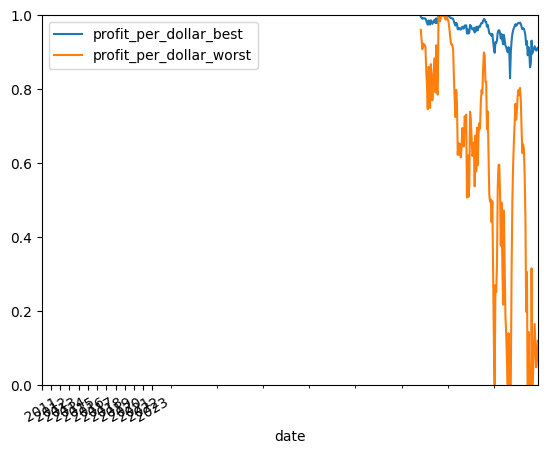

In [672]:
# plot profit_per_dollar with y axis between 0 and 1, x axis is year and at a 30 degree angle
fig, ax = plt.subplots()
profit_per_dollar.plot(ax=ax)
ax.set_ylim(0,1)
plt.xticks(np.arange(0, len(profit_per_dollar), 12), [str(x)[:4] for x in profit_per_dollar.index[::12]])
plt.xticks(rotation=30)
plt.show()

In [673]:
# same plot again but it also includes the log price, scaled from 0 to 1
log_price = np.log(df['price'])
# log_price = df['price']
log_price = log_price.iloc[::-1]
log_price = (log_price - log_price.min()) / (log_price.max() - log_price.min())
log_price = log_price.rename('log_price')


halving_dates = pd.DataFrame({
    'date': ['2012-11-28', '2016-07-09', '2020-05-11', '2024-04-01'],
})
halving_dates['date'] = pd.to_datetime(halving_dates['date'])

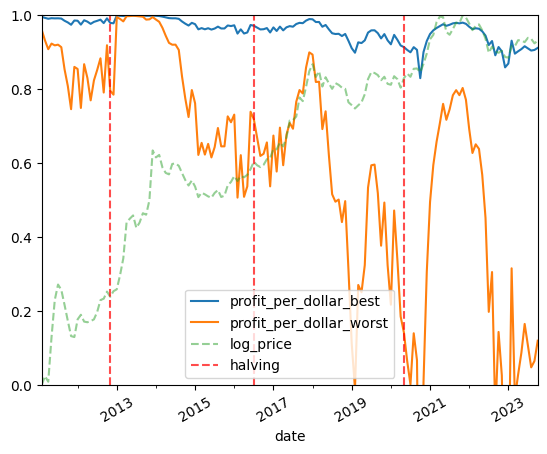

In [674]:
fig, ax = plt.subplots()
profit_per_dollar.plot(ax=ax)
log_price.plot(ax=ax, linestyle='--', alpha=0.5, label='log_price')

# Add vertical lines for halving events
for (i,date) in enumerate(halving_dates['date']):
    if i == 0:
        ax.axvline(x=date, color='red', linestyle='--', alpha=0.7, label='halving')
    else:
        ax.axvline(x=date, color='red', linestyle='--', alpha=0.7)

ax.set_ylim(0,1)
# plt.xticks(np.arange(0, len(profit_per_dollar), 12), [str(x)[:4] for x in profit_per_dollar.index[::12]])
plt.xticks(rotation=30)
plt.legend()
plt.show()

In [675]:
# PART 2
# Plotting the market cap


# this csv only goes back to 2014
# df = pd.read_csv('../pricehistory/price_full.csv')
# btcmarketcap = df[['Start','Market Cap']]
# btcmarketcap.set_index('Start', inplace=True)
# btcmarketcap = btcmarketcap.iloc[::-1]
# btcmarketcap = btcmarketcap[btcmarketcap['Market Cap'] != 0]
# btcmarketcap["day"] = btcmarketcap.index
# btcmarketcap.reset_index(drop=True, inplace=True)
# btcmarketcap

In [676]:
df = pd.read_csv('bitcoin@public.csv',delimiter=';')
btcmarketcap = df[["CapMrktCurUSD","Date"]].dropna()
btcmarketcap.rename(columns={"CapMrktCurUSD":"Market Cap","Date":"day"},inplace=True)
btcmarketcap["day"] = pd.to_datetime(btcmarketcap["day"])
btcmarketcap.index = btcmarketcap["day"]
btcmarketcap = btcmarketcap[["Market Cap"]]

# create a january first for each year and interpolate the market cap
for year in range(2014,2022):
    btcmarketcap.loc[pd.to_datetime(f"{year}-01-01")] = np.nan
btcmarketcap.sort_index(inplace=True)
btcmarketcap.interpolate(inplace=True)

btcmarketcap["day"] = btcmarketcap.index
# looks like
# 4730	6.864460e+11	2021-06-01
# 4731	5.947511e+11	2021-07-15
btcmarketcap

,Market Cap,day
day,,
2010-07-18,2.959592e+05,2010-07-18
2010-07-19,2.792852e+05,2010-07-19
2010-07-20,2.590004e+05,2010-07-20
2010-07-21,2.752665e+05,2010-07-21
2010-07-22,2.037496e+05,2010-07-22
...,...,...
2021-12-16,9.009626e+11,2021-12-16
2021-12-17,8.758845e+11,2021-12-17
2021-12-18,8.867044e+11,2021-12-18


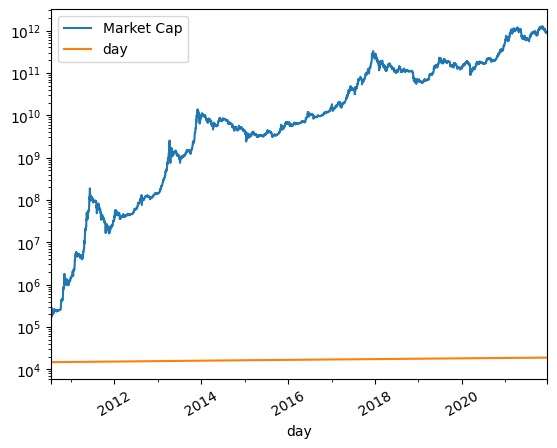

In [677]:
# plot btcmarketcap with log10 y axis, x axis is year and at a 30 degree angle
fig, ax = plt.subplots()
btcmarketcap.plot(ax=ax)
ax.set_yscale('log')
# since the days are not evenly spaced, we can't use np.arange
# plt.xticks([btcmarketcap.index[0],btcmarketcap.index[-1]], [str(btcmarketcap["day"].iloc[0])[:4],str(btcmarketcap["day"].iloc[-1])[:4]])
plt.xticks(rotation=30)
plt.show()

In [678]:
# from https://data.un.org/
gdp = pd.read_csv('gdp.csv', encoding='ISO-8859-1') # Country,Year,TypeOfValue,Value
gdp = gdp[gdp['TypeOfValue'] == 'GDP in current prices (millions of US dollars)']
gdp = gdp[["Country","Year","Value"]]
gdp = gdp.reset_index(drop=True)
# ignore all rows that come before the first row that has "Afghanistan" in the country column
gdp = gdp.iloc[gdp[gdp['Country'] == 'Afghanistan'].index[0]:]
gdp = gdp.reset_index(drop=True)
gdp["Value"] = gdp["Value"].str.replace(",","").astype(float)*1e6
gdp # now looks like: 0	Afghanistan	1995 2.757000e+09

,Country,Year,Value
0,Afghanistan,1995,2.757000e+09
1,Afghanistan,2005,6.221000e+09
2,Afghanistan,2010,1.469900e+10
3,Afghanistan,2015,1.871300e+10
4,Afghanistan,2019,1.890400e+10
...,...,...,...
1480,Zimbabwe,2010,1.204200e+10
1481,Zimbabwe,2015,1.996300e+10
1482,Zimbabwe,2019,2.259500e+10
1483,Zimbabwe,2020,2.166500e+10


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


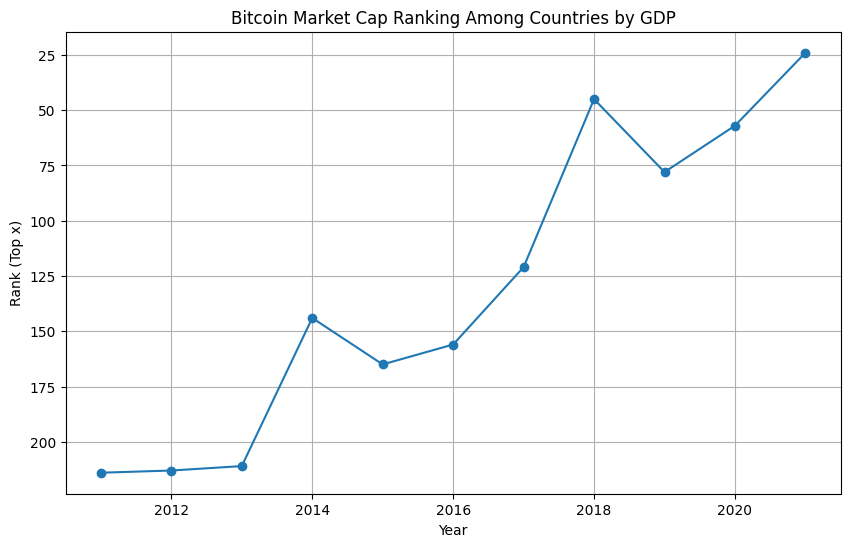

In [679]:
# Step 1: Take the natural logarithm of every value in the 'Value' and 'Market Cap' columns
gdp['ln_Value'] = np.log(gdp['Value'])
btcmarketcap['ln_Market_Cap'] = np.log(btcmarketcap['Market Cap'])

first_year = 2011

# Step 2: Interpolate missing GDP values for each country from first_year to 2021
# First, pivot the gdp dataframe for easier manipulation
gdp_pivot = gdp.pivot(index='Country', columns='Year', values='ln_Value')

# Interpolate linearly across the years for each country
gdp_interpolated = gdp_pivot.reindex(columns=range(1995, 2022)).interpolate(axis=1)

# Filter out the years we are interested in (first_year-2021)
gdp_interpolated = gdp_interpolated.loc[:, first_year:2021]

# Step 3: Extract Bitcoin market cap for each January 1st from first_year to 2021
btcmarketcap['Date'] = pd.to_datetime(btcmarketcap['day'])
btc_jan_1st = btcmarketcap[btcmarketcap['Date'].dt.month == 1]
btc_jan_1st = btc_jan_1st[btc_jan_1st['Date'].dt.day == 1]
btc_jan_1st = btc_jan_1st.set_index(btc_jan_1st['Date'].dt.year)
btc_jan_1st = btc_jan_1st.loc[first_year:2021, 'ln_Market_Cap']

# Step 4: Rank Bitcoin market cap among the countries' GDPs and plot the rankings
rankings = pd.DataFrame(index=range(first_year, 2022))
for year in range(first_year, 2022):
    year_gdp = gdp_interpolated[year].dropna()
    btc_cap = btc_jan_1st.loc[year]
    rank = (year_gdp < btc_cap).sum() + 1  # Ranking position; +1 because rank starts from 1
    rankings.loc[year, 'Rank'] = rank

# Step 5, take the amount of countries and substrack the rankings
countries_count = gdp_interpolated.shape[0]
rankings['Rank'] = countries_count - rankings['Rank'] + 1

# Plotting the rankings
plt.figure(figsize=(10, 6))
plt.plot(rankings.index, rankings['Rank'], marker='o')
plt.title('Bitcoin Market Cap Ranking Among Countries by GDP')
plt.xlabel('Year')
plt.ylabel('Rank (Top x)')
plt.grid(True)
# invert y axis
plt.gca().invert_yaxis()
plt.show()

In [680]:
countries_count

214

In [681]:
np.array(gdp_interpolated.index)

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurin. State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaï¿½ao', 'Cyprus', 'Czechia',
       'Cï¿½te dï¿½Ivoire', "Dem. People's Rep. Korea",
       'Dem. Rep. of the Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equ